# Machine Learning

<img src=ml_class.png>

Basicamente, *machine learning*- ou  aprendizado de máquina - é o estudo que permite automatizar uma tarefa sem a intervenção direta de um humano, usando modelos para extrair as informações de bases de dados.

No jargão, o modelo "treina" com base nos dados de entrada, e depois "prevê" resultados a medida que encontra novas situações.

Os modelos podem ser:

- **Supervisionados**: se o treino é realizado com a disponibilidade de variáveis respostas da base de treino
- **Não-supervisionados**: se o próprio algortimo é capaz de extrair as relações relevantes e inferir a variável resposta. Geralmente utilizado em clusterização

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.ion()
%matplotlib inline

## Modelos e algoritmos

Agora começamos algumas definições úteis

- **Modelo**: entendemos aqui como a formulação matemática que relaciona as variáveis de entrada com a(s) variável(is) de saída. Por exemplo, usaremos mais tarde o modelo $Y = \omega_0 + \omega_1 X$, onde X é uma matriz nxm com n pontos de m variáveis.
- **Algoritmo**: o processo matemático e estatítico usado para adequar - *fit* - o modelo aos dados.
- **Métrica de sucesso**: índice que será usado na avaliação da qualidade do resultado. Depende do modelo utilizado
- **Preprocessamento, ou *data prep***: preparação da base de dados para uso no algoritmo (selecionar/extrair variáveis, tratar valores faltantes, etc)

## *Overfitting* e *Underfitting*

Dois fenômenos, totalmente opostos e igualmente desastrosos, podem ocorrer aos se realizar o *fit* do modelo.

- ***Overfitting***: quando o modelo acaba por se adequar *demais* dos dados de treino, como se o algortimo tivesse decorado que tal entrada tem tal saída. Resultados podem estar longe da realidade para pontos não utilizados no *fit*. Dizemos que o modelo tem alta **variância**.
- ***Underfitting***: pelo contrário, quando o modelo quase não se adequa aos dados de treino. Dizemos que tem alto **viés**, pois apesar das informações apresentadas, pouco concede

<img src=over_under.png>

### Validação Cruzada

Uma maneira de contornar os problemas de *over* e *underfitting* é, em primeiro lugar, separar os dados em dois tipos: para treino e para teste. Assim temos maior controle quanto a qualidade do modelo nesse sentido.

#### *Overfitting*:

- **Característica**: Boa performance no *set* de treino, baixa no de teste.
- **Causa**: muitas variáveis, modelo muito complexo
- **Solução**: reduzir número de variáveis, regularização\*, mais pontos

#### *Underfitting*

- **Característica**: Baixa performance tanto no *set* de treino quanto no de teste
- **Causa**: modelo simples demais, muito rígido (regularização\*)
- **Solução**: mais variáveis

### *Feature Selection*

É importante, então, decidir quais informações valem de fato a pena serem usadas no modelo

Algumas formas principais de selecionar as variáveis:

#### Filtro

Seleciona variáveis com base na relação com a variável resposta. Independe do modelo

<img src='filter.png'>

#### Wrapper

Utiliza o próprio modelo para determinar a importância das variáveis.

<img src='wrapper.png'>

#### Embedded

Utiliza, além do modelo em si, a sua performance

<img src='embedded.png'>



## Regressão Linear
<br>
<br>
<img src=lin_reg.png width=400>

### Formulação

Na regressão linear, representamos a relação entre as variáveis independentes e depentendes no seguinte modelo:

$$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n + \epsilon$$

Ou, de forma matricial

$$ y = \Theta^{\it{T}}X + \epsilon$$

Onde $\Theta^{\it{T}} = [\theta_0\hspace{1.5mm}\theta_1 ... \theta_n]\hspace{1mm}$ e $\hspace{1mm}X = [1\hspace{1.5mm}x_1 ... x_n]^{\it{T}}$, e $\epsilon$ é o erro, que admitimos ter distribuição normal de média 0.

Nota-se que o termo **linear** se refere à relação entre os coeficientes. Sendo assim, o modelo $ y = a_1x_1 +a_2x_1^2+ a_3\log{x_1}$ é linear, pois basta substituir $x_2=x_1^2\hspace{1mm}$ e $\hspace{1mm}x_3=\log{x_1}$

#### Algoritmos

Como definimos anteriormente, já temos o modelo, agora falta definir como encontrar os coeficientes que mais adequam esse modelo aos nossos dados. Como estamos falando de **modelos supervisionados**, basicamente cada algoritmo tentará minimizar uma **função custo**, que mensiona o quanto os pontos estimados $\hat{y}$ estão divergentes dos pontos reais $y$.

##### Mínimos Quadrados

O mais simples dos algortimos, tem como função de custo a soma do quadrado das diferenças entre real e estimado, ou seja:

$$ FC = \sum_{j=0}^{M} (\hat{y}_j-y_j)^2 $$

Como consequência, o algoritmo se torna relativamente sensível a *outliers*, pontos que por acaso de distanciam do comportamento normal, já que o custo cresce com o quadrado da distância.



##### Ridge - Regularização $L_2$

A regularização tem por objetivo limitar a exploração do algoritmo quanto ao espaço de soluções possíveis. No caso do que chamamos de regularização $L_2$, adicionamos o quadrado dos coeficientes à função custo:

$$ FC = \sum_{j=0}^{M} (\hat{y}_j-y_j)^2 + \alpha\sum_{i=0}^{N} |\theta_i|^2 $$

O novo termo enrigece a solução, pois aumentos nos coeficientes serão penalizados, o que aumenta o viés, podendo ser utilizao para remediar o problema de *overfitting*.

Porém, mais um parâmetro deve ser definido: o valor de $\alpha$ que traz o melhor comprometimento viés-variância para a qualidade do modelo - maior $\alpha$ implica maior viés, sendo $\alpha=0$ o equivalente aos Mínimos Quadrados. Uma solução é a criação de uma terceira partição nos dados, além de treino e teste.

Com a primeira achamos o melhor $\Theta$ dado $\alpha$, a segunda usamos para definir o $\alpha$ mais adequado, e a terceira nos dá a medida da qualidade do modelo em si. 



##### Lasso - Regularização $L_1$

De forma semelhante ao **Ridge**, utiliza uma penalidade para os valores dos coeficientes, mas com a norma $l_1$. Sendo assim, este algoritmo costuma achar soluções em que os coeficientes das variáveis menos importantes são zerados. É comum usá-lo para selecionar variáveis.

$$ FC = \sum_{j=0}^{M} (\hat{y}_j-y_j)^2 + \alpha\sum_{i=0}^{N} |\theta_i| $$

Mesmas observações sobre o novo parâmetro $\alpha$ no algoritmo anterior.
<br>
<img src='L1_L2.png' width=500>

In [36]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, n_informative=7, noise=40, n_targets=1, random_state=33)

In [40]:
import pandas as pd
import numpy as np

dfx = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
dfy = pd.DataFrame(y, columns=['y'])
df  = pd.concat([dfx, dfy], axis=1)

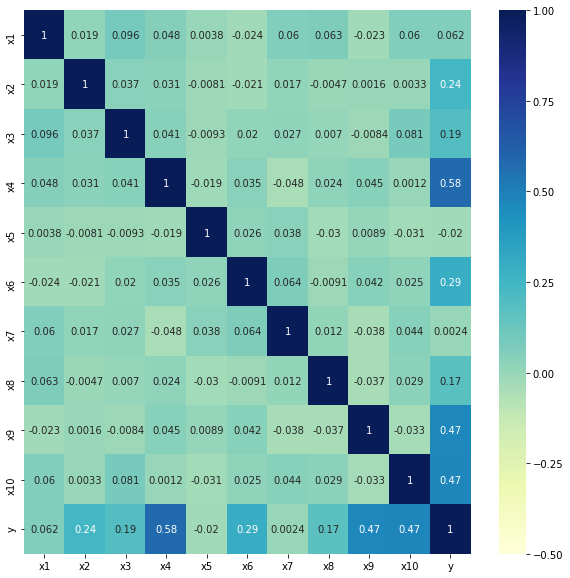

In [41]:
## Filtro

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-0.5, vmax=1, cmap="YlGnBu")

In [55]:
## Wrapper

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        temp = pd.Series(rfe.support_,index = dfx.columns)
        
print("Número ótimo de variáveis: %d" %nof)
print("Score com %d variáveis: %f" % (nof, high_score))

selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Número ótimo de variáveis: 7
Score com 7 variáveis: 0.917878
Index(['x2', 'x3', 'x4', 'x6', 'x8', 'x9', 'x10'], dtype='object')


In [51]:
## Embedded

from sklearn.linear_model import LassoCV

reg = LassoCV(cv=3)
reg.fit(X, y)
print("Melhor alfa usando LassoCV: %f" % reg.alpha_)
print("Melhor score usando LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = dfx.columns)

Melhor alfa usando LassoCV: 0.677833
Melhor score usando LassoCV: 0.922833


In [53]:
print("Lasso escolheu " + str(sum(coef != 0)) + " variáveis e eliminou outras " +  str(sum(coef == 0)) + " variáveis")

Lasso escolheu 7 variáveis e eliminou outras 3 variáveis


Text(0.5, 1.0, 'Importância das variáveis usando Lasso')

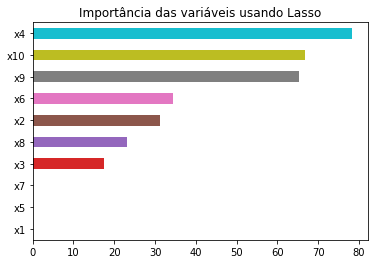

In [52]:
imp_coef = coef.sort_values()
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importância das variáveis usando Lasso")

### Padronização

Para evitar que variáveis com maior escala dominem a função custo, dado que uma variação nelas influenciariam mais o resultado, é necessário padronizar a escala de todos os *inputs* numéricos.

Isso pode ser feito subtraindo o valor mínimo e dividindo pelo intervalo de variação:

$$ x_p = \frac{x - x_{mín}}{x_{máx} - x_{mín}}$$

Ou subtraindo o valor médio e dividindo pela variância:

$$ x_n = \frac{x - \bar{x}}{s_x}$$

In [59]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

Xn = norm.fit_transform(X)

dfxn = pd.DataFrame(Xn, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])b

In [60]:
dfx.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-1.056920,-0.672073,-0.960083,0.252798,0.423360,-0.857306,1.108191,-0.085659,0.746253,-1.771030
1,1.492630,-0.683020,1.661359,-1.465034,2.416016,1.237280,1.256834,-0.752995,-0.103979,0.154984
2,-0.598440,-0.539051,-0.466137,1.551920,-1.143856,0.489765,-0.248254,-0.613308,1.427414,0.088667
3,-0.388458,-0.262189,-0.500926,-1.558579,0.888650,-1.315361,1.244888,-2.056838,0.304610,0.109365
4,-0.290152,2.833278,0.958522,-0.401913,-0.143101,-1.779779,0.167467,0.229248,0.549052,-0.265142


In [61]:
dfxn.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-1.024396,-0.639674,-0.995153,0.225984,0.449317,-0.866460,1.079429,-0.045189,0.778596,-1.796972
1,1.437607,-0.650542,1.682608,-1.510252,2.415287,1.182316,1.231581,-0.716404,-0.072652,0.126715
2,-0.581660,-0.507613,-0.490595,1.539024,-1.096911,0.451150,-0.309039,-0.575905,1.460572,0.060478
3,-0.378888,-0.232750,-0.526131,-1.604799,0.908376,-1.314497,1.219353,-2.027826,0.336425,0.081152
4,-0.283958,2.840361,0.964670,-0.435741,-0.109558,-1.768757,0.116496,0.271548,0.581159,-0.292904


### Métricas

Para avaliar a qualidade do modelo, temos a nosso dispor algumas métricas. No caso de regressões, as mais comuns são:

#### Variância explicada

Como o nome diz, nos dá o quanto o modelo consegue explicar da variação que observamos nos dados:

$$ VE(y,\hat{y}) = 1-\frac{Var(y-\hat{y})}{Var(y)}$$

#### Erro médio quadrado

Média no quadrado da diferença entre real e estimado

$$ EMQ = \frac{\sum_{j=1}^{M} (y-\hat{y})^2}{M+1}$$

#### Coeficiente de determinação - $R^2$

Nos trás o quão bem amostras futuras devem ser estimadas

$$ R^2=1-\frac{\sum_{j=0}^{M} (y-\hat{y})^2}{\sum_{j=0}^{M} (y-\bar{y})^2}$$

Notamos que $R^2$ é númericamente igual à variância explicada.

#### R ajustado - $R_{adj}^2$ ou $\bar{R^2}$

O coeficiente de determinação $R^2$ tende a aumentar com a adição de variáveis, independentemente de sua relevância para o modelo. Sendo assim, ao se comparar soluções com número diferente de *inputs*, devemos usar o R ajustado, que tenta controlar esse efeito (M: número de pontos; N: número de variáveis): 

$$ \bar{R^2}=1-(1-R^2)\frac{M-1}{M-N-1}$$




In [67]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import numpy as np

def r2_aj (y_true, y_pred, shape):
    R2 = r2_score(y_true, y_pred)
    ra = 1-(1-R2)*(shape[0]-1)/(shape[0]-shape[1]-1)
    return ra
    

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ln = LinearRegression()
rd = Ridge(alpha=0.5)
ls = Lasso(alpha=0.5)

In [76]:
## Regressão Linear


ln.fit(X,y)
y_ln = ln.predict(X)

expl_ln = explained_variance_score(y, y_ln)
mse_ln = mean_squared_error(y, y_ln)
r2_ln = r2_score(y, y_ln)
r2a_ln = r2_aj(y, y_ln, np.shape(X)) 

print('exp: %f' %expl_ln)
print('mse: %f' %mse_ln)
print('r2: %f' %r2_ln)
print('r2a: %f' %r2a_ln)

exp: 0.922981
mse: 1618.080424
r2: 0.922981
r2a: 0.922202


In [77]:
rd.fit(X,y)
y_rd = rd.predict(X)

expl_rd = explained_variance_score(y, y_rd)
mse_rd = mean_squared_error(y, y_rd)
r2_rd = r2_score(y, y_rd)
r2a_rd = r2_aj(y, y_rd, np.shape(X)) 

print('exp: %f' %expl_rd)
print('mse: %f' %mse_rd)
print('r2: %f' %r2_rd)
print('r2a: %f' %r2a_rd)

exp: 0.922980
mse: 1618.084765
r2: 0.922980
r2a: 0.922202


In [78]:
ls.fit(X,y)
y_ls = ls.predict(X)

expl_ls = explained_variance_score(y, y_ls)
mse_ls = mean_squared_error(y, y_ls)
r2_ls = r2_score(y, y_ls)
r2a_ls = r2_aj(y, y_ls, np.shape(X)) 

print('exp: %f' %expl_ls)
print('mse: %f' %mse_ls)
print('r2: %f' %r2_ls)
print('r2a: %f' %r2a_ls)

exp: 0.922898
mse: 1619.823678
r2: 0.922898
r2a: 0.922118


### Validação

Durante a decisão de escolha do modleo, é preciso ter controle da qualidade do que está sendo gerado. Se dependermos somente dos dados com que o algoritmo está treinando, corremos risco de *overfitting*, com muito erro ao se extrapolar para dados além do treino.

A solução mais simples é simular dados desconhecidos ao modelo, separando parte da base de treino, a ser usada somente na sua validação.


#### Hold-out

Método mais simples, dividem-se os dados históricos em *dataset* de treino e de validação. Apesar de se medir a qualidade do *fit* nos dados de treino, as decisões são tomadas com base na validação.

<img src=holdout.png>

#### Validação cruzada

Uma desvantagem do *hold-out* é a limitação que traz em termos de quantidade de pontos em que o modelo será treinado e validado. Se aumentarmos os pontos de treino, teremos menos pontos de validação, e vice-versa.

Como alternativa, podemos repetir a divisão treino-teste até passar por toda base de dados, efetuando a validação a cada passo. A performance geral do modelo é obtida da média da performance em cada divisão.

<img src=kfold.png>

#### Bootstrap (re-amostragem)

Com o *bootstrap*, um novo *dataset* é criado a partir de amostragens aleatórias - com reposição - dos dados que já temos.

Os dados históricos são entendidos como uma amostra da distribuição real dos dados, e o processo de *bootstrapping* procura recriar esse efeito.

<img src=bootstrap.png>
